https://blog.dominodatalab.com/fitting-gaussian-process-models-python/

In [0]:
import numpy as np
 
def exponential_cov(x, y, params):
  return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [0]:
def conditional(x_new, x, y, params):
  B = exponential_cov(x_new, x, params)
  C = exponential_cov(x, x, params)
  A = exponential_cov(x_new, x_new, params)

  mu = np.linalg.inv(C).dot(B.T).T.dot(y)
  sigma = A - B.dot(np.linalg.inv(C).dot(B.T))

  return(mu.squeeze(), sigma.squeeze())

In [0]:
import matplotlib.pylab as plt
 
theta = [1, 10]
sigma_theta = exponential_cov(0, 0, theta)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sigma_theta, capsize=0)

In [0]:
x = [1.]
y = [np.random.normal(scale=sigma_theta)]
y

In [0]:
sigma_1 = exponential_cov(x, x, theta)
 
def predict(x, data, kernel, params, sigma, t):
  k = [kernel(x, y, params) for y in data]
  Sinv = np.linalg.inv(sigma)
  y_pred = np.dot(k, Sinv).dot(t)
  sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
  return y_pred, sigma_new

In [0]:
x_pred = np.linspace(-3, 3, 100)
predictions = [predict(i, x, exponential_cov, theta, sigma_1, y) for i in x_pred]

In [0]:
y_pred, sigmas = np.transpose(predictions)
#plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [0]:
m, s = conditional([-0.7], x, y, theta)
y2 = np.random.normal(m, s)
y2

In [0]:
x.append(-0.7)
y.append(y2)
 
sigma_2 = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sigma_2, y) for i in x_pred]

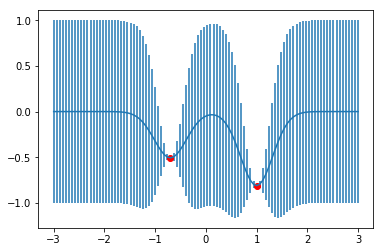

In [15]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [0]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, theta)
y_more = np.random.multivariate_normal(mu, s)
y_more

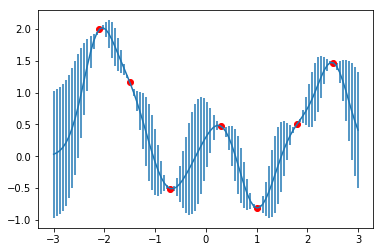

In [17]:
x += x_more
y += y_more.tolist()
 
sigma_new = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sigma_new, y) for i in x_pred]
 
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

以下はオリジナルで追加したコード。sin波の学習ができるか試している

berow param shows nice fitting

In [0]:
x0 = np.arange(0, 10, 0.5)
y0 = np.sin(x0)
theta2 = [1, 10]
x_pred2 = np.linspace(0, 10, 100)

In [0]:
def exponential_cov2(x, y, params):
  return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [0]:
def predict2(x_pred_elem, x0, kernel, params, sigma, y0):
  #print(len(sigma))
  k = [kernel(x_pred_elem, y, params) for y in x0]
  Sinv = np.linalg.inv(sigma)
  #print(Sinv)
  y_pred = np.dot(k, Sinv).dot(y0)
  sigma_new = kernel(x_pred_elem, x_pred_elem, params) - np.dot(k, Sinv).dot(k)
  #print(len(sigma_new))
  return y_pred, sigma_new

20
20
20
100
100


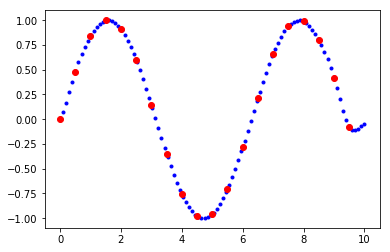

In [21]:
sigma_sin = exponential_cov2(x0, x0, theta2)
print(len(x0))
print(len(y0))
print(len(sigma_sin))
predictions = [predict2(x_pred_elem, x0, exponential_cov2, theta2, sigma_sin, y0) for x_pred_elem in x_pred2]
 
y_pred2, sigmas = np.transpose(predictions)
print(len(x_pred2))
print(len(y_pred2))
#plt.errorbar(x_pred2, y_pred, yerr=sigmas, capsize=0)
plt.plot(x_pred2, y_pred2, "b.")
plt.plot(x0, y0, "ro")

prediction not works

In [0]:
x0 = np.arange(0, 10, 0.5)
y0 = np.sin(x0)
theta2 = [1, 10]
x_pred2 = np.linspace(0, 20, 200)

20
20
20
200
200


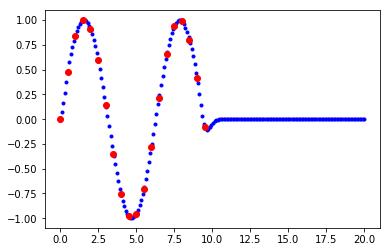

In [23]:
sigma_sin = exponential_cov2(x0, x0, theta2)
print(len(x0))
print(len(y0))
print(len(sigma_sin))
predictions = [predict2(i, x0, exponential_cov, theta2, sigma_sin, y0) for i in x_pred2]
 
y_pred2, sigmas = np.transpose(predictions)
print(len(x_pred2))
print(len(y_pred2))
#plt.errorbar(x_pred2, y_pred, yerr=sigmas, capsize=0)
plt.plot(x_pred2, y_pred2, "b.")
plt.plot(x0, y0, "ro")

別実装のコードで書いてみる（現状うまくいかず)

In [0]:
import numpy as np
import matplotlib.pylab as plt

class BasicKernel:
  def __init__(self, param):
    self.param = param
  
  def __call__(self,x, y):
    a, w = self.param
    #return a * np.exp( -0.5 * w * np.subtract.outer(x, y)**2)
    return a * np.exp( -0.5 * w * (x - y)**2)
    

In [0]:
theta3 = [1, 20]
x0 = np.arange(0, 10, 0.5)
y0 = np.sin(x0)
x1 = np.linspace(0, 10, 20) 

kernel = BasicKernel(theta3)

noise_mat = np.eye(20) * 0.01

             
k00 = kernel(*np.meshgrid(x0,x0))
print(k00.shape)
k00 = k00 + noise_mat
#print(k00)
k00_inv = np.linalg.inv(k00) # 逆行列

In [0]:
k01 = kernel(*np.meshgrid(x0,x1,indexing='ij'))
k10 = k01.T
k11 = kernel(*np.meshgrid(x1,x1))

In [0]:
mu = k10.dot(k00_inv.dot(y0)) #フィッティングした値

In [0]:
sigma = k11 - k10.dot(k00_inv.dot(k01))

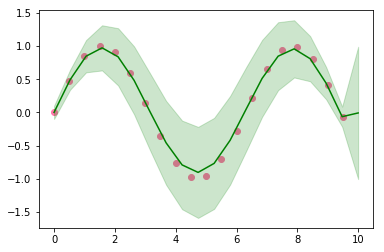

In [29]:
plt.scatter(x0,y0,c='#ff77aa')
plt.plot(x1,mu,'g') # 推測された平均
#plt.plot(x0,y0,'--r') # 本物の関数
std = np.sqrt(sigma.diagonal()) # 各点の標準偏差は共分散行列の対角成分
plt.fill_between(x1, mu-std, mu+std, alpha=0.2, color='g') # 推測された標準偏差の中の領域
plt.show()

まるっとコピー(上で書き換えをした対象の別実装版)

(30,)
(30, 30)
(30, 30)
(30, 30)
(30, 101)
(30, 101)
(101, 101)
(101, 101)


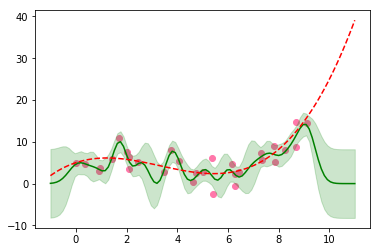

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class RBFkernel:
    def __init__(self,*param):
        self.param = list(param)

    def __call__(self,x1,x2):
        a,s,w = self.param
        print(x1.shape)
        print(x2.shape)
        return a**2*np.exp(-((x1-x2)/s)**2) + w*(x1==x2)

def y(x): # 知りたい関数の正体
    return 0.1*x**3-x**2+2*x+5

x0 = np.random.uniform(0,10,30) # 既知の点
print(x0.shape)
y0 = y(x0) + np.random.normal(0,2,30) # 関数にノイズを加える
x1 = np.linspace(-1,11,101) # 探す点

kernel = RBFkernel(8,0.5,3.5) # 適当なパラメータを使うカーネル関数

k00 = kernel(*np.meshgrid(x0,x0))
print(k00.shape)
k00_1 = np.linalg.inv(k00) # 逆行列
k01 = kernel(*np.meshgrid(x0,x1,indexing='ij'))
k10 = k01.T
k11 = kernel(*np.meshgrid(x1,x1))

# ここでは上述の方程式の通りのμとΣ
mu = k10.dot(k00_1.dot(y0))
sigma = k11 - k10.dot(k00_1.dot(k01))

plt.scatter(x0,y0,c='#ff77aa')
plt.plot(x1,mu,'g') # 推測された平均
plt.plot(x1,y(x1),'--r') # 本物の関数
std = np.sqrt(sigma.diagonal()) # 各点の標準偏差は共分散行列の対角成分
plt.fill_between(x1,mu-std,mu+std,alpha=0.2,color='g') # 推測された標準偏差の中の領域
plt.show()

予測にトライ => そもそも学習したxの範囲の教えていないxでの値が予測できていれば、それが予測できているということだと結論した。

In [0]:
import numpy as np
import matplotlib.pylab as plt

class BasicKernel:
  def __init__(self, param):
    self.param = param
  
  def __call__(self,x, y):
    a, w = self.param
    #return a * np.exp( -0.5 * w * np.subtract.outer(x, y)**2)
    return a * np.exp( -0.5 * w * (x - y)**2)
    

In [0]:
theta3 = [1, 20]
x0 = np.arange(0, 10, 0.5)
y0 = np.sin(x0)
#y0 = 0.1*x0**3-x0**2+2*x0+5
x1 = np.linspace(0, 10, 40) 

kernel = BasicKernel(theta3)

noise_mat = np.eye(20) * 0.01

             
k00 = kernel(*np.meshgrid(x0,x0))
k00 = k00 + noise_mat
k00_inv = np.linalg.inv(k00) # 逆行列

In [0]:
k01 = kernel(*np.meshgrid(x0,x1,indexing='ij'))
k01_T = k01.T
#print(k01_T.shape)
k11 = kernel(*np.meshgrid(x1,x1))

In [0]:
mu = k01_T.dot(k00_inv.dot(y0)) #フィッティングした値

In [0]:
sigma = k11 - k01_T.dot(k00_inv.dot(k01))

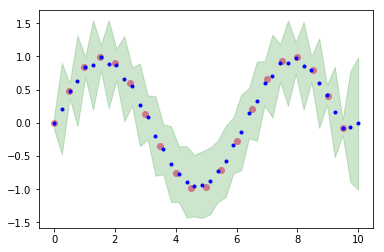

In [36]:
plt.scatter(x0,y0,c='#ff77aa')
plt.plot(x1,mu,'b.') # 推測された平均
#plt.plot(x0,y0,'--r') # 本物の関数
std = np.sqrt(sigma.diagonal()) # 各点の標準偏差は共分散行列の対角成分
plt.fill_between(x1, mu-std, mu+std, alpha=0.2, color='g') # 推測された標準偏差の中の領域
plt.show()

2変数の関数を描いてみる

In [0]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
    

In [0]:
theta4 = [1, 20]
x0 = np.arange(-10, 10, 0.5)
y0 = np.arange(-10, 10, 0.5)
x0_0_mesh, x_mesh = np.meshgrid(x0[:,0],[:,1])
eps = 0.001
R = np.sqrt(x0_mesh**2 + y0_mesh**2) + eps;
z0 = np.sin(R) / R + eps
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x0_mesh, y0_mesh, z0)
plt.show()


2変数の関数のフィッティングをして可視化してみる（拾ってきたコードベース)  
http://krasserm.github.io/2018/03/19/gaussian-processes/

In [0]:
!cd /root
!wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/gaussian_processes_util.py

In [0]:
from gaussian_processes_util import plot_gp_2D


In [0]:
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    ''' Computes the suffifient statistics of the GP posterior predictive distribution from m training data X_train and Y_train and n new inputs X_s. Args: X_s: New input locations (n x d). X_train: Training locations (m x d). Y_train: Training targets (m x 1). l: Kernel length parameter. sigma_f: Kernel vertical variation parameter. sigma_y: Noise parameter. Returns: Posterior mean vector (n x d) and covariance matrix (n x n). '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

In [0]:
from numpy.linalg import cholesky
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise):
    '''
    Returns a function that computes the negative log-likelihood
    for training data X_train and Y_train and given noise level.
    
    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        
    Returns:
        Minimization objective.
    '''
    def step(theta):
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        # Compute determinant via Cholesky decomposition
        return np.sum(np.log(np.diagonal(cholesky(K)))) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    return step

In [0]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    ''' Isotropic squared exponential kernel. Computes a covariance matrix from points in X1 and X2. Args: X1: Array of m points (m x d). X2: Array of n points (n x d). Returns: Covariance matrix (m x n). '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [0]:
noise_2D = 0.1

rx, ry = np.arange(-5, 5, 0.3), np.arange(-5, 5, 0.3)
gx, gy = np.meshgrid(rx, rx)

X_2D = np.c_[gx.ravel(), gy.ravel()]

X_2D_train = np.random.uniform(-4, 4, (100, 2))
Y_2D_train = np.sin(0.5 * np.linalg.norm(X_2D_train, axis=1)) + \
             noise_2D * np.random.randn(len(X_2D_train))

plt.figure(figsize=(14,7))

mu_s, _ = posterior_predictive(X_2D, X_2D_train, Y_2D_train, sigma_y=noise_2D)
plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train, 
           f'Before parameter optimization: l={1.00} sigma_f={1.00}', 1)

res = minimize(nll_fn(X_2D_train, Y_2D_train, noise_2D), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

mu_s, _ = posterior_predictive(X_2D, X_2D_train, Y_2D_train, *res.x, sigma_y=noise_2D)
plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train,
           f'After parameter optimization: l={res.x[0]:.2f} sigma_f={res.x[1]:.2f}', 2)

最初の方法で多次元入力に対応できるか試してみる

In [0]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


In [0]:
# グラフをプロットするだけのセル
x0 = np.arange(-10, 10, 0.5)
y0 = np.arange(-10, 10, 0.5)
x0_mesh, y0_mesh = np.meshgrid(x0,y0)
eps = 0.001
R = np.sqrt(x0_mesh**2 + y0_mesh**2) + eps;
z0 = np.sin(R) / R + eps
print(x0_mesh.shape)
print(y0_mesh.shape)
print(z0.shape)
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.plot_wireframe(x0_mesh, y0_mesh, z0)
#plt.show()

In [0]:
def kernel_fn(x, y, params):
  #return params[0] * np.exp( -0.5 * params[1] * (x - y)**2)
  #return params[0] * np.exp( -0.5 * params[1] * ((x - y)*((x - y).T)))
  #print("kernel_fn")
  #print(x.shape)
  #print(y.shape)
  x_T = x.T
  y_T = y.T
  #return params[0] * np.exp( -0.5 * params[1] * (((x_T - y_T).T)*((x_T - y_T))))
  return params[0] * np.exp( -0.5 * params[1] * np.dot((x_T - y_T).T,(x_T - y_T)))

In [0]:
def hidim_predict(x_pred_elem, x0, kernel, params, sigma, y0):
  #print(len(sigma))
  k = [kernel(x_pred_elem, y, params) for y in x0]
  #print("sigma")
  #print(sigma.shape)
  Sinv = np.linalg.inv(sigma)
  #print(Sinv)
  y_pred = np.dot(k, Sinv).dot(y0)
  sigma_new = kernel(x_pred_elem, x_pred_elem, params) - np.dot(k, Sinv).dot(k)
  #print(len(sigma_new))
  return y_pred, sigma_new

In [0]:
x0 = np.random.uniform(-10, 10, (100, 2))
#x0 = np.arange(-10, 10, 0.5)
#y0 = np.arange(-10, 10, 0.5)
#y0 = np.sin(x0)
eps = 0.001
x0_0_mesh, x0_1_mesh = np.meshgrid(x0[:,0], x0[:,1])
R = np.sqrt(x0_0_mesh**2 + x0_1_mesh**2) + eps;
y0 = np.sin(R) / R + eps

theta_hidim = [1, 100]

In [0]:
sigma_hidim = kernel_fn(x0, x0, theta_hidim)
noise_mat = np.eye(100) * eps
sigma_hidim += noise_mat
x_pred_hidim = np.random.uniform(-10, 10, (100, 2))

print(x0.shape)
print("y0")
print(y0.shape)
print("sigma_hidim")
print(sigma_hidim.shape)
predictions = [hidim_predict(x_pred_elem, x0, kernel_fn, theta_hidim, sigma_hidim, y0) for x_pred_elem in x_pred_hidim]
 
y_pred_hidim, sigmas = np.transpose(predictions)
print(x_pred_hidim.shape)
print(y_pred_hidim.shape)
#plt.errorbar(x_pred2, y_pred, yerr=sigmas, capsize=0)
#plt.plot(x_pred_hidim, y_pred_hidim, "b.")
#plt.plot(x0, y0, "ro")

#x_pred_hidim_10_mesh, x_pred_hidim_11_mesh = np.meshgrid(x_pred_hidim[:,0],x_pred_hidim[:,1])
#print("shape of x[0] x[1] y")
#print(x_pred_hidim_10_mesh.shape)
#print(x_pred_hidim_11_mesh.shape)
#print(y_pred_hidim.shape)
fig = plt.figure()
#ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111, projection='3d')
#ax.set_aspect('equal')
#ax = plt.gca()

X = x_pred_hidim[:,0].tolist()
Y = x_pred_hidim[:,1].tolist()
Z = np.abs(y_pred_hidim).tolist()
print("x, y, z")
print(len(X))
print(len(Y))
print(len(Z))
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
#self.ax.set_zlim(0, width)


#plt.gca().invert_xaxis()
#ax.autoscale(enable=True)
ax.scatter(X, Y, Z, c="r", marker="1", depthshade=True)
#ax.scatter(x, y, z)
plt.show()

#y_pred_hidim_mesh = np.reshape(y_pred_hidim, (200, 1))
#print(y_pred_hidim_mesh.shape)
#ax.plot_wireframe(x_pred_hidim_10_mesh, x_pred_hidim_11_mesh, y_pred_hidim_mesh)
#plt.show()